**Understanding financial performances over time using Nasdaq data link API**

Aims:
- analyze financial trend of 'accured expenses turnover' over a period
- examine how different regions contribute to these financial metrics

In [67]:
import config
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
api_key = config.API_KEY
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

# rate limits: 20 calls per 10 minutes, 50 calls per day

parameters = {
    'api_key': api_key,
    'qopts.per_page': 10
}

json_data = requests.get(api_url, params=parameters).json()
json_data

{'datatable': {'data': [[2438,
    1868192544,
    -1802,
    10.481948,
    '2011-06-30',
    'Q2',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2024-12-31',
    'Accrued Expenses Turnover',
    'Derived'],
   [2438,
    1868216112,
    -1802,
    8.161754,
    '2011-09-30',
    'Q3',
    'U',
    'EUR',
    'True',
    'Deutsche Bank AG',
    'Deutsche Bank AG',
    'Active',
    'DEU',
    'Europe',
    1159508,
    '5.1.1',
    'DB',
    'NYS',
    'Taunusanlage 12',
    None,
    None,
    None,
    'Frankfurt am Main',
    None,
    'DEU',
    '60325',
    '(49) 69 910 00',
    '(49) 69 910 34 225',
    'www.db.com',
    '2024-12-31',
    'Accrued Expenses Turnover',
    'Derived']

**Processing JSON data into Dataframe**

In [69]:
api_url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'
# change lmit to 10,000 rows
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000
}
    
    
json_data = requests.get(api_url, params=parameters).json()
data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [70]:
df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

Looking over the columns, reflecting with our primary aims (expense turnover and different regions), we can get rid of irrelevant columns that don't add to analysis, ex: addresses, phone numbers,website and keep columns related to price, regions...

In [71]:
necessary_columns=[
    'reportid',
    'reportdate',
    'reporttype',
    'amount',
    'longname',
    'country',
    'region',
    'indicator',
    'statement']

In [72]:
filtered_df = df_metric[necessary_columns]
updated_df = filtered_df[filtered_df["indicator"] == "Accrued Expenses Turnover"]
updated_df

,reportid,reportdate,reporttype,amount,longname,country,region,indicator,statement
0,1868192544,2011-06-30,Q2,10.481948,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
1,1868216112,2011-09-30,Q3,8.161754,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
2,1885063456,2012-06-30,Q2,10.788213,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
3,1885087024,2012-09-30,Q3,9.437545,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
4,1901934112,2013-06-30,Q2,8.755041,Deutsche Bank AG,DEU,Europe,Accrued Expenses Turnover,Derived
...,...,...,...,...,...,...,...,...,...
8454,1527971840,2011-12-31,A,96.208696,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived
8685,1551958016,2012-12-31,A,111.933333,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived
8920,1575878656,2013-12-31,A,122.645161,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived
9153,1599799296,2014-12-31,A,147.952941,Nielsen Holdings PLC,USA,Europe,Accrued Expenses Turnover,Derived


In [73]:
updated_df["amount"].describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

- On average, companies have an Accured Expenses Turnover of ~26.9. 
- SD is hugh, indicating that the variation between companies are significant -> diverse financial management strategies among companies 
- The distribution is rightly skewed, some companies having much higher turnovers than others.

In [74]:
updated_df["country"].unique()

array(['DEU', 'BHS', 'GBR', 'JPN', 'CYM', 'USA', 'IRL'], dtype=object)

In [75]:
#clean country column for readability 
country_mapping = {
    'DEU': 'Germany',
    'BHS': 'Bahamas',
    'GBR': 'Great Britain',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'USA': 'United States of America',
    'IRL': 'Ireland'
}

country_name = updated_df["country"].map(country_mapping)
country_name
    

0                        Germany
1                        Germany
2                        Germany
3                        Germany
4                        Germany
                  ...           
8454    United States of America
8685    United States of America
8920    United States of America
9153    United States of America
9386    United States of America
Name: country, Length: 139, dtype: object

In [86]:
updated_df["country"] = country_name
updated_df = updated_df.rename(columns={'longname':'company_name'})
updated_df.columns=['report_id','report_date','report_type',
                   'amount','company_name','country','region',
                   'indicator','statement']

In [87]:
country_name.value_counts()

country
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
Great Britain                4
Name: count, dtype: int64

now, we extract relevant data for a specific time period for trend visualization

In [88]:
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

relevant_data = updated_df[["company_name", "report_date", "amount"]]
relevant_data

,company_name,report_date,amount
0,Deutsche Bank AG,2011-06-30,10.481948
1,Deutsche Bank AG,2011-09-30,8.161754
2,Deutsche Bank AG,2012-06-30,10.788213
3,Deutsche Bank AG,2012-09-30,9.437545
4,Deutsche Bank AG,2013-06-30,8.755041
...,...,...,...
8454,Nielsen Holdings PLC,2011-12-31,96.208696
8685,Nielsen Holdings PLC,2012-12-31,111.933333
8920,Nielsen Holdings PLC,2013-12-31,122.645161
9153,Nielsen Holdings PLC,2014-12-31,147.952941


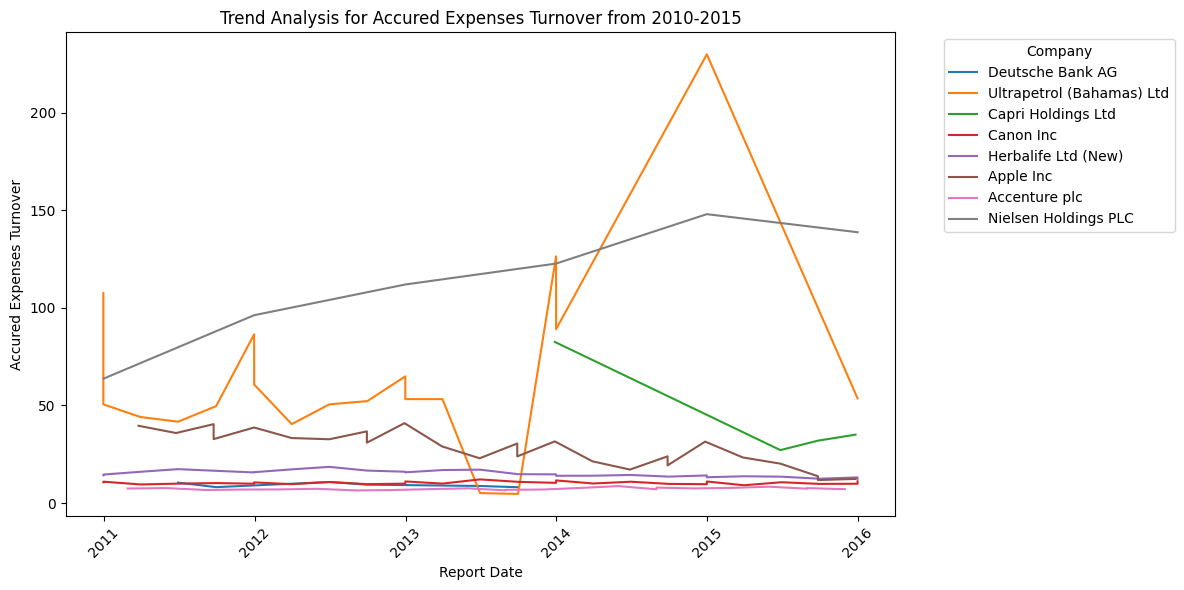

In [89]:
plt.figure(figsize=(12, 6))

for company in relevant_data["company_name"].unique():
    company_data = relevant_data[relevant_data["company_name"] == company]
    plt.plot(company_data["report_date"], company_data["amount"], label = company)
    
plt.title("Trend Analysis for Accured Expenses Turnover from 2010-2015")
plt.xlabel('Report Date')
plt.ylabel('Accured Expenses Turnover')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Most companies show stable turnover ratios, suggesting steady expense management and predictable short-term operations (e.g., Canon Inc, Apple, Deutsche Bank AG, Herbalife) -> these companies tend to intentionally carry accured expenses longer, using them as a working capital management tool
- Ultrapetrol (Bahamas) Ltd stands out for extreme volatility, sharp spikes around 2014-2015 -> suggests irregular expense recognitioon 
- Nielsen Holdings show clear upward trend, indicating improving efficiency in managing accured expenses over most of period
- Capri Holdings only shows up after 2014 (company name was changed, formerly Micheal Kors Holdings), reflecting limited data availability prior to that year raather than a change in performance 

Now analyze data based on geographical regions

In [95]:
# Grouping data by country and calculating the average of the 'amount'
country_avg = updated_df.groupby('country')['amount'].mean()
country_avg

country
Bahamas                     66.515369
Cayman Islands              15.060796
Germany                      9.288999
Great Britain               44.166750
Ireland                      7.264400
Japan                       10.376605
United States of America    44.377585
Name: amount, dtype: float64

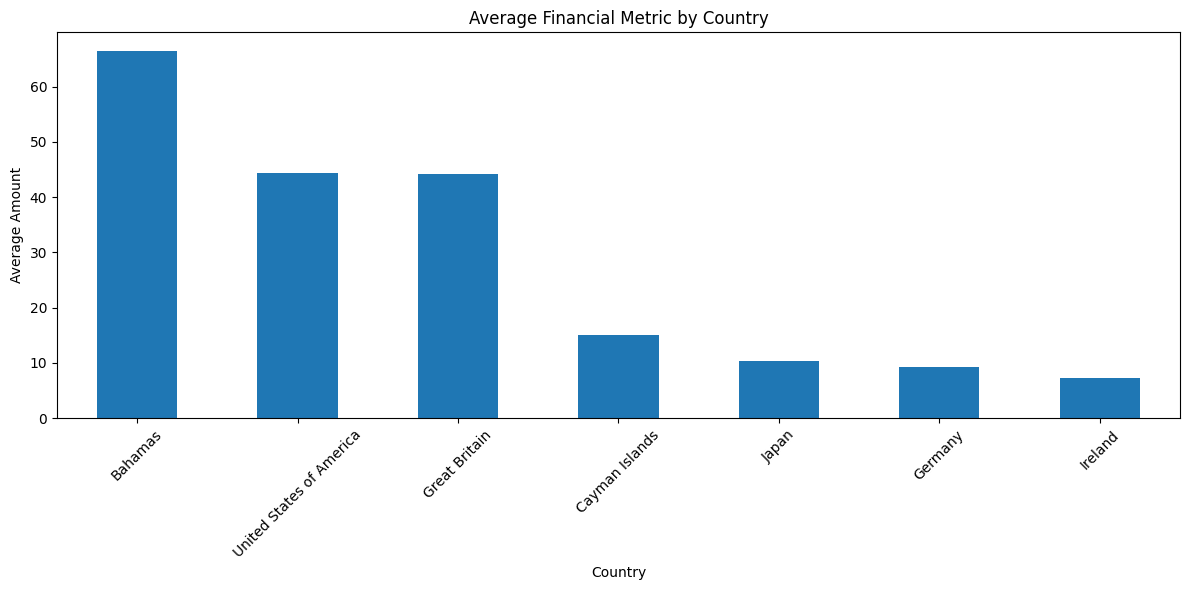

In [96]:
plt.figure(figsize=(12,6))

country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis**
- Bahamas stands out clearly with the highest average value, likely driven by a small number of firms with unusually high turnover values (i.e. Ultracontrol)
- US and Great Britain have similar average values, reflecting mix of firm sizes and industries, countries appear to balance efficiency with standardized expense management
- Japan, Germany, and Ireland show lower average values, aligns with more conservative accounting norms, predictable operating cycles, emphasis on long-term supplier relationships 

Country level averages reflect the composition of firms in the dastaset rather than inherent national financial practices (we saw earlier US had 31 entries, while Germany and Great Britain had 6 and 4 respectively)